### Jadon Oliver
### 4/3/2024
### Pokedex Web Scraping

In [81]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt


# This Program's purpose is to scrape the information from popular pokedex website serebii and find out different pieces of information from that data about the newer games: Pokemon Scarlet and Violet

# scrapes the data from the url

In [82]:
# Function to scrape Pokémon data from a given URL
def scrape_pokemon_data(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        page = response.content
        soup = bs(page, 'html.parser')
        # Add your scraping logic here
        return soup
    else:
        print(f"Oops! Received status code {status}")
        return None

# Scrapes all of the data from seribii and puts all of it into a dataframe

# Provides all lists needed for the program

In [83]:
# Define column names for DataFrame
columns = [
        "Name",
        "Pokedex Number",
        "Type",
        "Base Stats Total",
        "Health",
        "Attack",
        "Defense",
        "Special Attack",
        "Special Defense",
        "Speed",
        "Generation",
        "Location",
        "S/V Regional Variants",
        "Legendary/Mythical",
]
# List of legendary and mythical Pokémon
legendary_mythical_pokemon = [
        "Articuno",
        "Zapdos",
        "Moltres",
        "Mewtwo",
        "Mew",
        "Raikou",
        "Entei",
        "Suicune",
        "Lugia",
        "Ho-Oh",
        "Celebi",
        "Regirock",
        "Regice",
        "Registeel",
        "Latias",
        "Latios",
        "Kyogre",
        "Groudon",
        "Rayquaza",
        "Jirachi",
        "Deoxys",
        "Uxie",
        "Mesprit",
        "Azelf",
        "Dialga",
        "Palkia",
        "Heatran",
        "Regigigas",
        "Giratina",
        "Cresselia",
        "Phione",
        "Manaphy",
        "Darkrai",
        "Shaymin",
        "Arceus",
        "Victini",
        "Cobalion",
        "Terrakion",
        "Virizion",
        "Tornadus",
        "Thundurus",
        "Reshiram",
        "Zekrom",
        "Landorus",
        "Kyurem",
        "Keldeo",
        "Meloetta",
        "Genesect",
        "Xerneas",
        "Yveltal",
        "Zygarde",
        "Diancie",
        "Hoopa",
        "Volcanion",
        "Type: Null",
        "Silvally",
        "Tapu Koko",
        "Tapu Lele",
        "Tapu Bulu",
        "Tapu Fini",
        "Cosmog",
        "Cosmoem",
        "Solgaleo",
        "Lunala",
        "Necrozma",
        "Magearna",
        "Marshadow",
        "Zeraora",
        "Meltan",
        "Melmetal",
        "Zarude",
        "Regieleki",
        "Regidrago",
        "Glastrier",
        "Spectrier",
        "Calyrex",
        "Kubfu",
        "Urshifu",
        "Enamorus",
        "Wo-Chien",
        "Chien-Pao",
        "Ting-Lu",
        "Chi-Yu",
        "Okidogi",
        "Munkidori",
        "Fezandipiti",
        "Ogerpon",
        "Zacian",
        "Zamazenta",
        "Eternatus",
        "Koraidon",
        "Miraidon",
        "Terapagos",
        "Pecharunt"
        
]
    
# List of regional variants
regional_var_list = [
        "Wooper",
        "Tauros",
        "Clodsire",
        "Dipplin",
        "Hydrapple",
        "Wiglett",
        "Toedscruel",
        "Wugtrio",
        "Toedscool",
        "Great Tusk",
        "Scream Tail",
        "Brute Bonnet",
        "Flutter Mane",
        "Slither Wing",
        "Sandy Shocks",
        "Roaring Moon",
        "Walking Wake",
        "Gouging Fire",
        "Raging Bolt",
        "Iron Treads",
        "Iron Bundle",
        "Iron Hands",
        "Iron Jugulis",
        "Iron Moth",
        "Iron Thorns",
        "Iron Valiant",
        "Iron Leaves",
        "Iron Boulder",
        "Iron Crown"
        
]
    
# List of locations
locations_list = [
        "Alfornada",
        "Alfornada Cavern",
        "Area Zero",
        "Artazon",
        "Asado Desert",
        "Cabo Poco",
        "Caph Squad Base",
        "Cascarrafa",
        "Casseroya Lake",
        "Cortondo",
        "Dalizapa Passage",
        "East Paldean Sea",
        "East Province",
        "Glaseado Mountain",
        "Great Crater of Paldea",
        "Inlet Grotto",
        "Levincia",
        "Los Platos",
        "Medali",
        "Mesagoza",
        "Montenevera",
        "Naranja Academu",
        "Navi Squad's Base",
        "North Paldean Sea",
        "North Province",
        "Poco Path",
        "Pokemon League",
        "Porto Marinada",
        "Research Station",
        "Ruchbah Squad's Base",
        "Schedar Squad's Base",
        "Segin Squad's Base",
        "Socarrat Trail",
        "South Paldean Sea",
        "South Province",
        "Tagtree Thicket",
        "Uva Academy",
        "West Paldean Sea",
        "West Province",
        "Zapapico",
        "Zero Gate",
        "Zero Lab",
]

In [84]:
# Function to process Pokémon data 
def process_pokemon_data(url):

    # Initialize an empty DataFrame
    pokemon_df = pd.DataFrame(columns=columns)
    
    # Initialize a stack to store URLs to be processed
    url_stack = [url]

    # Loop until there are URLs to be processed
    while url_stack:
        # Pop the last URL from the stack
        current_url = url_stack.pop()

        # Scrape Pokémon data from the current URL
        soup = scrape_pokemon_data(current_url)

        # Check if scraping was successful
        if soup:
            # Extract information about Pokémon from the scraped HTML
            fooinfo_elements = soup.find_all("td", class_="fooinfo")
            fooinfo_img_elements = soup.find_all("td", class_="cen")
            pokemon_name = ""
            final_types = []
            bst_value = 0
            health, attack, defense, special_attack, special_defense, speed = (
                0,
                0,
                0,
                0,
                0,
                0,
            )
            pokenum, pokegen = 0, None
            poke_location = []

            for element in fooinfo_elements:
                text = element.text.strip()
                if text:
                    # Pokémon Name
                    if not pokemon_name:
                        pokemon_name = text
                    # Pokedex Number
                    pokenum_match = re.search(r"National: #(\d+)", text)
                    if pokenum_match:
                        pokenum = int(pokenum_match.group(1))
            bst_value = 0

            final_types = []

            for element in fooinfo_img_elements:
                try:
                    types = element.find(attrs={"class": "typeimg"}).get("alt")
                    next_img = element.find_next("img", attrs={"class": "typeimg"})
                    if next_img:
                        types += "/" + next_img.get("alt")
                        while next_img := next_img.find_next(
                            "img", attrs={"class": "typeimg"}
                        ):
                            types += "/" + next_img.get("alt")

                    final_types.append(types)
                except Exception as e:
                    print("")

            # Convert final_types to a single string separated by '/'
            final_types_str = "/".join(set("/".join(final_types).split("/")))

            for element in fooinfo_elements:
                # Use regular expression to search for the base stats total block
                bst_match = re.search(r"Base Stats - Total: (\d+)", element.text)
                if bst_match:
                    bst_value = int(bst_match.group(1))
                    next_elements = element.find_next_siblings(
                        "td", limit=6
                    )  # Limit to 6 siblings to get subsequent stats

                    if len(next_elements) >= 6:
                        health = next_elements[0].text.strip()
                        attack = next_elements[1].text.strip()
                        defense = next_elements[2].text.strip()
                        special_attack = next_elements[3].text.strip()
                        special_defense = next_elements[4].text.strip()
                        speed = next_elements[5].text.strip()

                    break  # Exit the loop once base stats are found

            # Determine Generation
            if 1 <= pokenum < 152:
                pokegen = 1
            elif 152 <= pokenum < 252:
                pokegen = 2
            elif 252 <= pokenum < 387:
                pokegen = 3
            elif 387 <= pokenum < 494:
                pokegen = 4
            elif 494 <= pokenum < 650:
                pokegen = 5
            elif 650 <= pokenum < 722:
                pokegen = 6
            elif 722 <= pokenum < 810:
                pokegen = 7
            elif pokenum >= 810 and pokenum < 906:
                pokegen = 8
            elif pokenum >= 906 and pokenum <= 1025:
                pokegen = 9

            # Check if legendary/mythical
            lege_poke = "Yes" if pokemon_name in legendary_mythical_pokemon else "No"

            # Check if regional variant
            regional_var_poke = "Yes" if pokemon_name in regional_var_list else "No"

            # Find locations
            for location in locations_list:
                if re.search(
                    location, " ".join([el.text.strip() for el in fooinfo_elements])
                ):
                    poke_location.append(location)

            # Create row data
            extracted_pokemon = {
                "Name": pokemon_name,
                "Pokedex Number": pokenum,
                "Type": final_types_str,
                "Base Stats Total": bst_value,
                "Health": health,
                "Attack": attack,
                "Defense": defense,
                "Special Attack": special_attack,
                "Special Defense": special_defense,
                "Speed": speed,
                "Generation": pokegen,
                "Location": ",".join(poke_location),
                "S/V Regional Variants": regional_var_poke,
                "Legendary/Mythical": lege_poke,
            }

            # Append to DataFrame
            pokemon_df = pd.concat(
                [pokemon_df, pd.DataFrame([extracted_pokemon])], ignore_index=True
            )

            # Find next page URL
            possibleCorrectHrefs = []
            href_tags = soup.find_all("a", href=True)
            for tag in href_tags:
                href = tag.get("href")
                if "/pokedex-sv/" in href:
                    possibleCorrectHrefs.append(href)
            if possibleCorrectHrefs:
                correctHref = possibleCorrectHrefs[-1]  # Get the last href
                next_url = "https://www.serebii.net" + correctHref
                url_stack.append(next_url)

            if pokenum == 1025:
                break

    return pokemon_df


url = "https://www.serebii.net/pokedex-sv/bulbasaur/"
pokemon_data = process_pokemon_data(url)
if pokemon_data is not None:
    display(pokemon_data)
else:
    print("Error retrieving data.")


KeyboardInterrupt: 

In [ ]:
#convert data frame to csv file to save data
pokemon_data.to_csv('pokemon_data.csv')

## 1. What types of Pokemon (grass, water, fire) were the most added in the new Scarlet and Violet generation?

Grass-type       19
Normal-type      14
Dragon-type      14
Ghost-type       13
Water-type       13
Dark-type        13
Electric-type    12
Poison-type      12
Psychic-type     11
Fire-type        11
Fighting-type    11
Steel-type       11
Fairy-type        9
Rock-type         9
Ground-type       7
Bug-type          7
Ice-type          7
Flying-type       6
Name: count, dtype: int64

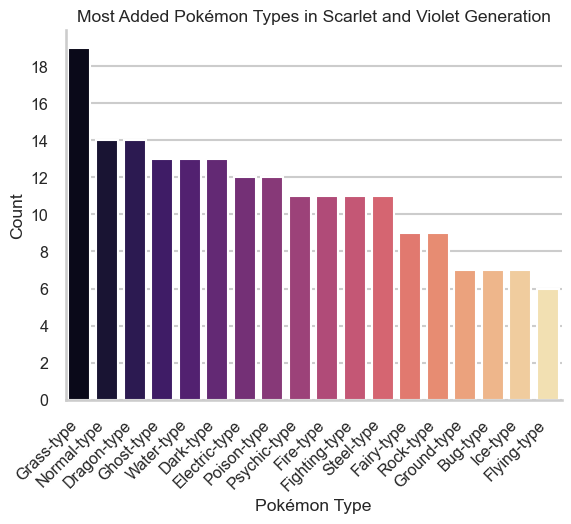

In [85]:
# Get file path for pokemon data csv
file_path = 'pokemon_data.csv'

# Read the CSV file into a DataFrame
pokemon_data = pd.read_csv(file_path)

# Filter Pokémon data for Scarlet and Violet generation (Generation 9)
scarlet_violet_pokemon = pokemon_data[pokemon_data['Generation'] == 9]

# Split the types for each Pokémon and count them accordingly
types = []
for row in scarlet_violet_pokemon['Type']:
    types.extend(row.split('/'))

# Count the types
type_counts = pd.Series(types).value_counts()

display(type_counts)

# Set the context for the plots
sns.set_context("talk", font_scale=0.7)  # Decrease text size

# Plot the count of Pokémon types using a bar plot
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette="magma")  # Change color palette to "magma"
ax.set_title("Most Added Pokémon Types in Scarlet and Violet Generation")
ax.set_xlabel("Pokémon Type")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate the x-axis labels
ax.set_yticks(range(0, max(type_counts.values) + 1, 2))  # Increment y-axis ticks by 2
sns.despine()  # Remove the top and right spines
sns.set_style("whitegrid")  # Set the style to whitegrid

### Looking at the plot above, Grass type was the most added type in the new generation followed by normal and dragon type while flying type was the least added type. Historically, dragon types used to be the least common type in pokemon but it is interesting to see that shift in this game.

## 2. How many regional variants were added to Scarlet and Violet compared to previous games?

In [86]:
# Count regional variants in Scarlet and Violet
scarlet_violet_regional_variant_count = scarlet_violet_pokemon[scarlet_violet_pokemon["S/V Regional Variants"] == "Yes"].shape[0]

print("Regional Variants added to Scarlet and Violet:", scarlet_violet_regional_variant_count)


Regional Variants added to Scarlet and Violet: 27


### Pokemon Scarlet and Violet added 27 regional Variants to the game. In the Alola region, there are 18 regional variants added to that specific region, 19 to the Galar Region, and 16 in the Hisui Region, making pokemon Scarlet and Violet the game with the most pokemon added based off old pokemon in the series

## 3. What are the base stat differences between previous generations of legendary and mythical Pokemon compared to those of Scarlet and Violet?

In [87]:
# Filter legendary and mythical Pokémon
legendary_mythical_pokemon = pokemon_data[pokemon_data["Legendary/Mythical"] == "Yes"]


# Define the stats columns
stats_columns = ["Base Stats Total", "Health", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]

# Calculate the average stats for each generation's legendary/mythical Pokémon
average_stats_by_generation = legendary_mythical_pokemon.groupby("Generation")[stats_columns].mean()

print("Average Stats for each Generation's Legendary/Mythical Pokémon:")
display(average_stats_by_generation)



Average Stats for each Generation's Legendary/Mythical Pokémon:


,Base Stats Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
Generation,,,,,,,
1,604.000000,95.200000,97.000000,93.000000,119.800000,98.000000,101.000000
2,620.000000,103.400000,99.000000,99.000000,99.000000,119.600000,100.000000
3,616.000000,85.500000,104.500000,109.000000,111.500000,116.000000,89.500000
4,612.307692,96.230769,99.615385,103.923077,111.153846,104.692308,96.692308
5,609.090909,94.181818,110.272727,90.727273,115.818182,96.272727,101.818182
6,600.000000,70.000000,106.666667,110.000000,126.666667,123.333333,63.333333
7,526.666667,89.500000,85.000000,95.666667,94.166667,93.666667,68.666667
8,578.750000,103.583333,105.833333,85.833333,93.000000,81.666667,108.833333
9,573.750000,91.416667,98.500000,99.333333,88.833333,98.750000,96.916667


### Looking at the data, pokemon scarlet and violet has on average, the weakest legendary pokemon when comparing the stats to that of other generations except generation 7. My theory is a combination of 1: a lot of legendary and mythical pokemon are getting evolutions now which lower the base stat total average because of the pre evolutionary pokemon, and 2: they are adding more legendary pokemon in the most recent generations instead of having a handful which is overall lowering the amount of legendary pokemon with high stats.

## 4. Which location in Pokemon Scarlet and Violet has statistically the highest possible stat Pokemon on average?

,Location,Mean Base Stat Total
14,Great Crater of Paldea,605.000000
25,Poco Path,580.000000
28,Research Station,580.000000
32,Socarrat Trail,495.684211
8,Casseroya Lake,469.551020
24,North Province,453.765217
2,Area Zero,444.895062
23,North Paldean Sea,431.739130
13,Glaseado Mountain,427.921053
10,Dalizapa Passage,419.224138


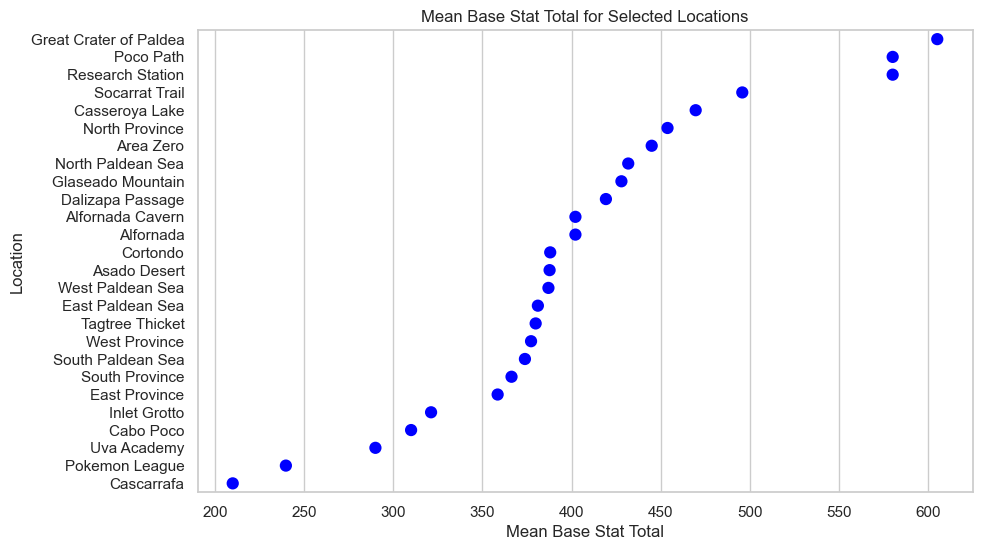

In [89]:
# Initialize a dictionary to store total base stat total and count for each location
location_stats = {location: {"total": 0, "count": 0} for location in locations_list}

# Iterate through each row in the pokemon_data DataFrame
for index, row in pokemon_data.iterrows():
    # Check if the Location column has NaN values
    if pd.notna(row["Location"]):
        # Split the locations string and iterate through each location
        for location in row["Location"].split(","):
            location = location.strip()  # Remove leading/trailing whitespaces
            if location in location_stats:
                # Update total base stat total and count for the location
                location_stats[location]["total"] += row["Base Stats Total"]
                location_stats[location]["count"] += 1

# Calculate mean base stat total for each location
mean_base_stat_totals = {}
for location, stats in location_stats.items():
    if stats["count"] > 0:
        mean_base_stat_totals[location] = stats["total"] / stats["count"]
    else:
        mean_base_stat_totals[location] = 0  # Handle division by zero case
# Convert dictionary to DataFrame
mean_base_stat_df = pd.DataFrame(mean_base_stat_totals.items(), columns=["Location", "Mean Base Stat Total"])

# Filter out locations with mean base stat total of 0
mean_base_stat_df = mean_base_stat_df[mean_base_stat_df["Mean Base Stat Total"] != 0]

# Sort DataFrame by mean base stat total in descending order
mean_base_stat_df = mean_base_stat_df.sort_values(by="Mean Base Stat Total", ascending=False)

display(mean_base_stat_df)

# Create point plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
point_plot = sns.pointplot(x="Mean Base Stat Total", y="Location", data=mean_base_stat_df, join=False, color="blue")
point_plot.set_title('Mean Base Stat Total for Selected Locations')
point_plot.set_xlabel('Mean Base Stat Total')
point_plot.set_ylabel('Location')
plt.show()


### Looking at this plot, We can see that the location with the highest base stat average is the Great Crater of Paldea and the lowest base stat average is Cascarrafa. If a player wanted to catch the strongest pokemon in the game, it would be beneficial for them to go to the Great Crater of Paldea as soon as possible.